In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from string import ascii_letters as letters
from string import digits
import itertools
import seaborn as sns

plt.style.use(['dark_background'])
# plt.rcParams['figure.dpi'] = 300
%matplotlib inline

In [189]:
df = pd.read_csv('csv/kbb_scraper-2000.csv', header=None)
df = df.drop_duplicates()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Used 2018 Chevrolet Malibu LT w/ 1LT,"18,488",One Owner,No Accident / Damage Reported,NaN,"43,008",2 wheel drive - front,4-Cylinder Turbo,6-Speed Automatic,Gasoline,27 City / 36 Highway,Summit White,Jet Black W/Leather-Appointed
1,Used 2020 Lexus LS 500 AWD,"73,991",One Owner,No Accident / Damage Reported,GREAT,641,All wheel drive,6-Cylinder Turbo,10-Speed Automatic,Gasoline,16 City / 25 Highway,Liquid Platinum,Chateau
2,Used 2015 Dodge Challenger Scat Pack,"33,936",One Owner,No Accident / Damage Reported,GREAT,"26,827",2 wheel drive - rear,8-Cylinder,8-Speed Automatic,Gasoline,15 City / 25 Highway,Sublime Pearl Coat,Black
3,Used 2018 Dodge Journey FWD Crossroad,"18,989",One Owner,No Accident / Damage Reported,GREAT,"26,562",2 wheel drive - front,6-Cylinder,6-Speed Automatic,Flexible Fuel,17 City / 25 Highway,Bruiser Gray Clearcoat,Black
4,Used 2020 Ford Escape 4WD SEL,"29,858",Multiple Owners,No Accident / Damage Reported,GOOD,"7,559",All wheel drive,4-Cylinder Turbo,8-Speed Automatic,Gasoline,23 City / 31 Highway,Desert Gold Metallic,Ebony


In [190]:
df.columns = ['title', 'price','owner', 'accident', 'price_rating', 'mileage', 'drive_type', 'engine', 'transmission', 'fuel_type', 'mpg', 'exterior', 'interior']
df.head()

,title,price,owner,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,mpg,exterior,interior
0,Used 2018 Chevrolet Malibu LT w/ 1LT,"18,488",One Owner,No Accident / Damage Reported,NaN,"43,008",2 wheel drive - front,4-Cylinder Turbo,6-Speed Automatic,Gasoline,27 City / 36 Highway,Summit White,Jet Black W/Leather-Appointed
1,Used 2020 Lexus LS 500 AWD,"73,991",One Owner,No Accident / Damage Reported,GREAT,641,All wheel drive,6-Cylinder Turbo,10-Speed Automatic,Gasoline,16 City / 25 Highway,Liquid Platinum,Chateau
2,Used 2015 Dodge Challenger Scat Pack,"33,936",One Owner,No Accident / Damage Reported,GREAT,"26,827",2 wheel drive - rear,8-Cylinder,8-Speed Automatic,Gasoline,15 City / 25 Highway,Sublime Pearl Coat,Black
3,Used 2018 Dodge Journey FWD Crossroad,"18,989",One Owner,No Accident / Damage Reported,GREAT,"26,562",2 wheel drive - front,6-Cylinder,6-Speed Automatic,Flexible Fuel,17 City / 25 Highway,Bruiser Gray Clearcoat,Black
4,Used 2020 Ford Escape 4WD SEL,"29,858",Multiple Owners,No Accident / Damage Reported,GOOD,"7,559",All wheel drive,4-Cylinder Turbo,8-Speed Automatic,Gasoline,23 City / 31 Highway,Desert Gold Metallic,Ebony


In [191]:
df.shape
# df.to_csv('kbb_data_dupdropped2.csv')

(1150, 13)

In [192]:
df.isna().sum()

title             0
price             2
owner           112
accident        113
price_rating    197
mileage           0
drive_type        0
engine            0
transmission      0
fuel_type         0
mpg               0
exterior          0
interior          1
dtype: int64

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 0 to 2254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1150 non-null   object
 1   price         1148 non-null   object
 2   owner         1038 non-null   object
 3   accident      1037 non-null   object
 4   price_rating  953 non-null    object
 5   mileage       1150 non-null   object
 6   drive_type    1150 non-null   object
 7   engine        1150 non-null   object
 8   transmission  1150 non-null   object
 9   fuel_type     1150 non-null   object
 10  mpg           1150 non-null   object
 11  exterior      1150 non-null   object
 12  interior      1149 non-null   object
dtypes: object(13)
memory usage: 125.8+ KB


## ===== (1) Cleaning Data =====

In [194]:
# Seeing where in the dataframe it contains 'MSRP'
mask = np.column_stack([df[col].str.contains('MSRP', na=False) for col in df])
df.loc[mask.any(axis=1)]

,title,price,owner,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,mpg,exterior,interior
181,New 2020 GMC Terrain FWD SLE,"31,465MSRP",NaN,NaN,NaN,7,2 wheel drive - front,4-Cylinder Turbo,9-Speed Automatic,Gasoline,26 City / 30 Highway,Quicksilver Metallic - Gray,Jet Black Cloth
211,New 2020 Chrysler Pacifica Touring-L,"40,430MSRP",NaN,NaN,NaN,10,2 wheel drive - front,6-Cylinder,9-Speed Automatic,Gasoline,19 City / 28 Highway,Billet Silver Metallic Clearcoat,Black/Alloy
234,New 2021 Hyundai Palisade AWD SEL w/ Convenien...,"41,490MSRP",NaN,NaN,NaN,6,All wheel drive,6-Cylinder,8-Speed Automatic,Gasoline,19 City / 24 Highway,Moonlight Cloud,Black
815,New 2020 RAM 1500 4x4 Crew Cab Tradesman,"47,495MSRP",NaN,NaN,NaN,10,4 wheel drive,8-Cylinder,8-Speed Automatic,Gasoline,"5'8""",19 City / 24 Highway,Bright White Clearcoat
1018,New 2020 Jeep Cherokee 4WD Latitude,"29,925MSRP",NaN,NaN,NaN,10,4 wheel drive,4-Cylinder,9-Speed Automatic,Gasoline,21 City / 29 Highway,Light Brownstone Pearlcoat,Black
1218,New 2021 RAM 1500 Laramie,"61,110MSRP",NaN,NaN,NaN,10,4 wheel drive,8-Cylinder,8-Speed Automatic,Gasoline,"5'8""",19 City / 24 Highway,Delmonico Red Pearlcoat
1330,New 2020 RAM 1500 SLT,"42,435MSRP",NaN,NaN,NaN,24,4 wheel drive,6-Cylinder,8-Speed Automatic,Gasoline,"6'5""",16 City / 23 Highway,Billet Silver Metallic Clearcoat
2135,New 2020 Jeep Cherokee FWD Latitude,"28,790MSRP",NaN,NaN,NaN,10,2 wheel drive - front,4-Cylinder,9-Speed Automatic,Gasoline,22 City / 31 Highway,Billet Silver Metallic Clearcoat,Black
2254,New 2020 RAM 1500 Big Horn,"52,285MSRP",NaN,NaN,NaN,100,4 wheel drive,8-Cylinder,8-Speed Automatic,Gasoline,"5'8""",19 City / 24 Highway,Diamond Black Crystal Pearlcoat


In [195]:
df['mileage'] = df['mileage'].replace('\,', '', regex=True).replace(letters, '', regex=True)
df['mileage'] = pd.to_numeric(df['mileage'])

df['price'] = df['price'].replace('\,', '', regex=True).replace(r'MSRP', '', regex=True)
df['price'] = pd.to_numeric(df['price'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 0 to 2254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1150 non-null   object 
 1   price         1148 non-null   float64
 2   owner         1038 non-null   object 
 3   accident      1037 non-null   object 
 4   price_rating  953 non-null    object 
 5   mileage       1150 non-null   int64  
 6   drive_type    1150 non-null   object 
 7   engine        1150 non-null   object 
 8   transmission  1150 non-null   object 
 9   fuel_type     1150 non-null   object 
 10  mpg           1150 non-null   object 
 11  exterior      1150 non-null   object 
 12  interior      1149 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 125.8+ KB


### ===== mpg =====

In [196]:
# df['MPG (City)'] = df['']
for item in df['mpg'][:10]:
    print(item.split('/'))

['27 City ', ' 36 Highway']
['16 City ', ' 25 Highway']
['15 City ', ' 25 Highway']
['17 City ', ' 25 Highway']
['23 City ', ' 31 Highway']
['16 City ', ' 23 Highway']
['30 City ', ' 34 Highway']
['18 City ', ' 28 Highway']
['20 City ', ' 26 Highway']
['21 City ', ' 26 Highway']


In [197]:
df['mpg_city'] = [item.split('/')[0] for item in df['mpg']]
df['mpg_highway'] = [item.split('/')[1] if len(item.split('/')) == 2 else item.split('/')[0] for item in df['mpg']]

df['mpg_city'] = df['mpg_city'].str.replace('City', '').replace("'", '').map(lambda x: x.strip())
df['mpg_highway'] = df['mpg_highway'].str.replace('Highway', '').replace("'", '').map(lambda x: x.strip())

In [198]:
df['mpg_city'].unique()
# df['MPG (City)'].value_counts()

array(['27', '16', '15', '17', '23', '30', '18', '20', '21', '29', '19',
       '5\'10"', '26', 'Information Unavailable', '22', '25', '24', '14',
       "6'", '6\'6"', "5'", '5\'6"', '13', "8'", '5\'2"', '6\'5"', '31',
       '28', '33', '6\'7"', '5\'8"', 'White', '6\'2"', '32', '36', 'Blue',
       'Black', '12', '5\'4"', 'Crystal White', '40', '6\'4"'],
      dtype=object)

In [199]:
df['mpg_highway'].unique()
# df['MPG (Highway)'].value_counts()

array(['36', '25', '31', '23', '34', '28', '26', '37', '27', '5\'10"',
       '29', '32', 'Information Unavailable', '38', '24', '35', '33',
       '30', '19', "6'", '6\'6"', "5'", '5\'6"', '22', "8'", '21',
       '5\'2"', '41', '6\'5"', '20', '39', '40', '6\'7"', '5\'8"', '18',
       'White', '6\'2"', '42', 'Blue', 'Black', '5\'4"', 'Crystal White',
       '6\'4"', '16', '17'], dtype=object)

In [200]:
df[df['mpg_city'].str.startswith('5')][:5]

,title,price,owner,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,mpg,exterior,interior,mpg_city,mpg_highway
13,Used 2018 GMC Sierra 1500 Denali,50350.0,One Owner,No Accident / Damage Reported,GREAT,7554,4 wheel drive,8-Cylinder,8-Speed Automatic,Gasoline,"5'10""",15 City / 20 Highway,Onyx Black,"5'10""","5'10"""
64,Certified 2020 Ford Ranger XLT,34316.0,One Owner,No Accident / Damage Reported,GREAT,4725,4 wheel drive,4-Cylinder Turbo,10-Speed Automatic,Gasoline,5',20 City / 24 Highway,Iconic Silver Metallic,5',5'
65,Certified 2018 Ford F150 XL,34914.0,One Owner,No Accident / Damage Reported,GREAT,13056,4 wheel drive,6-Cylinder Turbo,10-Speed Automatic,Gasoline,"5'6""",18 City / 23 Highway,Magnetic Metallic,"5'6""","5'6"""
68,Certified 2018 Ford F150 XLT,36994.0,One Owner,No Accident / Damage Reported,GREAT,8195,4 wheel drive,6-Cylinder Turbo,10-Speed Automatic,Gasoline,"5'6""",18 City / 23 Highway,Race Red,"5'6""","5'6"""
72,Used 2019 Ford F150 XLT,39798.0,One Owner,No Accident / Damage Reported,GREAT,2677,4 wheel drive,6-Cylinder Turbo,10-Speed Automatic,Gasoline,"5'6""",18 City / 23 Highway,Oxford White,"5'6""","5'6"""


In [201]:
len(df.iloc[16]['mpg'])

20

In [202]:
df.loc[df['mpg_city'].str.len() > 3, 'mpg_city'] = df['mpg_city'].str[0]
df.loc[df['mpg_highway'].str.len() > 3, 'mpg_highway'] = df['mpg_highway'].str[-1]

df['mpg_city'].replace(r'[a-zA-Z]', '0', regex=True, inplace=True)
df['mpg_highway'].replace(r'[a-zA-Z]', '0', regex=True, inplace=True)

df['mpg_city'] = df['mpg_city'].astype(str).replace(r'[^0-9]', '0', regex=True)
df['mpg_highway'] = df['mpg_highway'].astype(str).replace(r'[^0-9]', '0', regex=True)

In [203]:
df['mpg_city'] = pd.to_numeric(df['mpg_city'])
df['mpg_highway'] = pd.to_numeric(df['mpg_highway'])

In [204]:
df = df.drop('mpg', axis=1)

In [205]:
df.reset_index(drop=True, inplace=True)

### ===== fuel_type =====

In [206]:
df['fuel_type'].unique()

array(['Gasoline', 'Flexible Fuel', 'Diesel', 'Hybrid Gas/Electric',
       '220 Miles', '208 Miles', '68 Miles', '76 Miles'], dtype=object)

In [207]:
df[df['fuel_type'].str.contains('Miles')][:5]

,title,price,owner,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,mpg_city,mpg_highway
265,Used 2020 Tesla Model 3 Standard Range Plus,39480.0,One Owner,No Accident / Damage Reported,GREAT,2462,2 wheel drive - rear,Electric,Single-Speed,220 Miles,Black,5YJ3E1EAXLF645346,0,0
482,Used 2014 Tesla Model S,31990.0,One Owner,No Accident / Damage Reported,GREAT,67500,2 wheel drive - rear,Electric,Single-Speed,208 Miles,Tan,5YJSA1S1XEFP38088,0,0
489,Used 2019 Tesla Model 3,37990.0,Multiple Owners,No Accident / Damage Reported,GREAT,13685,2 wheel drive - rear,Electric,Single-Speed,220 Miles,Black,5YJ3E1EA8KF395426,0,0
490,Used 2019 Tesla Model 3,38590.0,One Owner,No Accident / Damage Reported,GREAT,7352,2 wheel drive - rear,Electric,Single-Speed,220 Miles,Black,5YJ3E1EA4KF296876,0,0
677,Used 2014 smart fortwo electric drive Coupe,6991.0,Multiple Owners,No Accident / Damage Reported,NaN,14179,2 wheel drive - rear,Electric,Single-Speed,68 Miles,Design Black,WMEEJ9AA3EK732960,0,0


In [208]:
df['fuel_type'] = df['fuel_type'].replace(r'[0-9]+\s(m|M)iles', 'N/A', regex=True)
df['fuel_type'].unique()

array(['Gasoline', 'Flexible Fuel', 'Diesel', 'Hybrid Gas/Electric',
       'N/A'], dtype=object)

In [209]:
# pd.Categorical(df['Fuel Type'])
df['fuel_type'] = pd.factorize(df['fuel_type'])[0]
df['fuel_type'].unique()

array([0, 1, 2, 3, 4])

### ===== drive_type =====

In [210]:
df['drive_type'].value_counts()

2 wheel drive - front                 489
4 wheel drive                         338
All wheel drive                       201
2 wheel drive - rear                  120
Information Unavailable                 1
4 wheel drive - rear wheel default      1
Name: drive_type, dtype: int64

In [211]:
df['drive_type'] = df['drive_type'].replace('All wheel drive', '4 wheel drive').replace('4 wheel drive - rear wheel default', '4 wheel drive')
df['drive_type'].value_counts()

4 wheel drive              540
2 wheel drive - front      489
2 wheel drive - rear       120
Information Unavailable      1
Name: drive_type, dtype: int64

In [212]:
df[df['drive_type'] == 'Information Unavailable']

,title,price,owner,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,mpg_city,mpg_highway
465,Used 2011 Porsche Panamera,27990.0,Multiple Owners,No Accident / Damage Reported,GREAT,70502,Information Unavailable,6-Cylinder,7-Speed Automatic,0,Silver,Black,18,27


In [213]:
df['drive_type'] = df['drive_type'].replace('Information Unavailable', '2 wheel drive - rear')
df['drive_type'].value_counts()

4 wheel drive            540
2 wheel drive - front    489
2 wheel drive - rear     121
Name: drive_type, dtype: int64

In [214]:
df['drive_type'] = pd.factorize(df['drive_type'])[0]
df['drive_type'].value_counts()

1    540
0    489
2    121
Name: drive_type, dtype: int64

In [215]:
df['engine'].value_counts()

4-Cylinder                 321
6-Cylinder                 305
4-Cylinder Turbo           241
8-Cylinder                 175
6-Cylinder Turbo            74
8-Cylinder Turbo            14
3-Cylinder Turbo             7
Electric                     6
8-Cylinder Supercharged      6
3-Cylinder                   1
Name: engine, dtype: int64

In [216]:
df['transmission'].value_counts()

6-Speed Automatic                   499
8-Speed Automatic                   200
Continuously Variable Automatic     174
9-Speed Automatic                    73
10-Speed Automatic                   71
6-Speed Manual                       31
5-Speed Automatic                    31
7-Speed Automatic                    26
6-Speed Shiftable Automatic          11
4-Speed Automatic                    11
Information Unavailable               7
Single-Speed                          6
5-Speed Manual                        4
Automatic                             2
5-Speed Automatic with Overdrive      2
8-Speed Shiftable Automatic           1
5-Speed Manual with Overdrive         1
Name: transmission, dtype: int64

### ===== condition =====

In [217]:
df['combined_mpg'] = df['mpg_city'] + df['mpg_highway']
df['condition'] = [item.split()[0] for item in df['title']]
df.head()

,title,price,owner,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,mpg_city,mpg_highway,combined_mpg,condition
0,Used 2018 Chevrolet Malibu LT w/ 1LT,18488.0,One Owner,No Accident / Damage Reported,NaN,43008,0,4-Cylinder Turbo,6-Speed Automatic,0,Summit White,Jet Black W/Leather-Appointed,27,36,63,Used
1,Used 2020 Lexus LS 500 AWD,73991.0,One Owner,No Accident / Damage Reported,GREAT,641,1,6-Cylinder Turbo,10-Speed Automatic,0,Liquid Platinum,Chateau,16,25,41,Used
2,Used 2015 Dodge Challenger Scat Pack,33936.0,One Owner,No Accident / Damage Reported,GREAT,26827,2,8-Cylinder,8-Speed Automatic,0,Sublime Pearl Coat,Black,15,25,40,Used
3,Used 2018 Dodge Journey FWD Crossroad,18989.0,One Owner,No Accident / Damage Reported,GREAT,26562,0,6-Cylinder,6-Speed Automatic,1,Bruiser Gray Clearcoat,Black,17,25,42,Used
4,Used 2020 Ford Escape 4WD SEL,29858.0,Multiple Owners,No Accident / Damage Reported,GOOD,7559,1,4-Cylinder Turbo,8-Speed Automatic,0,Desert Gold Metallic,Ebony,23,31,54,Used


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1150 non-null   object 
 1   price         1148 non-null   float64
 2   owner         1038 non-null   object 
 3   accident      1037 non-null   object 
 4   price_rating  953 non-null    object 
 5   mileage       1150 non-null   int64  
 6   drive_type    1150 non-null   int64  
 7   engine        1150 non-null   object 
 8   transmission  1150 non-null   object 
 9   fuel_type     1150 non-null   int64  
 10  exterior      1150 non-null   object 
 11  interior      1149 non-null   object 
 12  mpg_city      1150 non-null   int64  
 13  mpg_highway   1150 non-null   int64  
 14  combined_mpg  1150 non-null   int64  
 15  condition     1150 non-null   object 
dtypes: float64(1), int64(6), object(9)
memory usage: 143.9+ KB


In [219]:
df['condition'].value_counts()

Used         965
Certified    117
New           68
Name: condition, dtype: int64

In [220]:
condition_dict = {'Used': 1, 'Certified': 2, 'New': 3}
df['condition'] = df['condition'].map(condition_dict)

In [221]:
df.head()

,title,price,owner,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,mpg_city,mpg_highway,combined_mpg,condition
0,Used 2018 Chevrolet Malibu LT w/ 1LT,18488.0,One Owner,No Accident / Damage Reported,NaN,43008,0,4-Cylinder Turbo,6-Speed Automatic,0,Summit White,Jet Black W/Leather-Appointed,27,36,63,1
1,Used 2020 Lexus LS 500 AWD,73991.0,One Owner,No Accident / Damage Reported,GREAT,641,1,6-Cylinder Turbo,10-Speed Automatic,0,Liquid Platinum,Chateau,16,25,41,1
2,Used 2015 Dodge Challenger Scat Pack,33936.0,One Owner,No Accident / Damage Reported,GREAT,26827,2,8-Cylinder,8-Speed Automatic,0,Sublime Pearl Coat,Black,15,25,40,1
3,Used 2018 Dodge Journey FWD Crossroad,18989.0,One Owner,No Accident / Damage Reported,GREAT,26562,0,6-Cylinder,6-Speed Automatic,1,Bruiser Gray Clearcoat,Black,17,25,42,1
4,Used 2020 Ford Escape 4WD SEL,29858.0,Multiple Owners,No Accident / Damage Reported,GOOD,7559,1,4-Cylinder Turbo,8-Speed Automatic,0,Desert Gold Metallic,Ebony,23,31,54,1


### ===== year, make_model =====

In [222]:
year = [item.split()[1] for item in df['title']]
isnum = [s for s in year if s.isdigit()]

len(year), len(isnum)

(1150, 1150)

In [223]:
df['year'] = [item.split()[1] for item in df['title']]
df['year'] = pd.to_numeric(df['year'])
df.head()[:2]

,title,price,owner,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,mpg_city,mpg_highway,combined_mpg,condition,year
0,Used 2018 Chevrolet Malibu LT w/ 1LT,18488.0,One Owner,No Accident / Damage Reported,NaN,43008,0,4-Cylinder Turbo,6-Speed Automatic,0,Summit White,Jet Black W/Leather-Appointed,27,36,63,1,2018
1,Used 2020 Lexus LS 500 AWD,73991.0,One Owner,No Accident / Damage Reported,GREAT,641,1,6-Cylinder Turbo,10-Speed Automatic,0,Liquid Platinum,Chateau,16,25,41,1,2020


In [224]:
df['brand'] = [item.split()[2] for item in df['title']]
df['brand'].value_counts()

Ford             294
Chevrolet        152
Toyota            87
Honda             78
Nissan            74
Jeep              69
Dodge             64
RAM               45
Hyundai           44
GMC               43
Kia               42
Buick             21
Volkswagen        18
Chrysler          14
Lincoln           13
MAZDA             11
Lexus             11
Subaru            10
Mercedes-Benz     10
Mitsubishi         9
BMW                8
Cadillac           7
Audi               5
Acura              5
Tesla              4
Volvo              3
Porsche            2
INFINITI           2
smart              1
Alfa               1
Genesis            1
MINI               1
Jaguar             1
Name: brand, dtype: int64

In [225]:
df['brand'] = pd.factorize(df['brand'])[0]

In [226]:
df['make_model'] = [' '.join(item.split()[2:]) for item in df['title']]
df = df.drop('title', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1148 non-null   float64
 1   owner         1038 non-null   object 
 2   accident      1037 non-null   object 
 3   price_rating  953 non-null    object 
 4   mileage       1150 non-null   int64  
 5   drive_type    1150 non-null   int64  
 6   engine        1150 non-null   object 
 7   transmission  1150 non-null   object 
 8   fuel_type     1150 non-null   int64  
 9   exterior      1150 non-null   object 
 10  interior      1149 non-null   object 
 11  mpg_city      1150 non-null   int64  
 12  mpg_highway   1150 non-null   int64  
 13  combined_mpg  1150 non-null   int64  
 14  condition     1150 non-null   int64  
 15  year          1150 non-null   int64  
 16  brand         1150 non-null   int64  
 17  make_model    1150 non-null   object 
dtypes: float64(1), int64(9), obj

In [227]:
df.isna().sum()

price             2
owner           112
accident        113
price_rating    197
mileage           0
drive_type        0
engine            0
transmission      0
fuel_type         0
exterior          0
interior          1
mpg_city          0
mpg_highway       0
combined_mpg      0
condition         0
year              0
brand             0
make_model        0
dtype: int64

### ===== owner =====

In [228]:
df['owner'].value_counts()

One Owner                        727
Multiple Owners                  310
No Accident / Damage Reported      1
Name: owner, dtype: int64

In [229]:
df[df['owner'] == 'No Accident / Damage Reported']

,price,owner,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,mpg_city,mpg_highway,combined_mpg,condition,year,brand,make_model
558,40495.0,No Accident / Damage Reported,NaN,GREAT,1894,2,8-Cylinder,6-Speed Manual,0,Summit White - White,Jet Black Leather,16,24,40,1,2019,0,Chevrolet Camaro SS Coupe w/ 1SS


In [230]:
df.loc[558, 'accident'] = 'No Accident / Damage Reported'
df.loc[558, 'owner'] = np.nan

In [231]:
df['owner'].value_counts()

One Owner          727
Multiple Owners    310
Name: owner, dtype: int64

In [232]:
df.drop(df[(df['owner'].isna()) & (df['combined_mpg'] < 11)].index, inplace=True)

In [233]:
df.loc[(df['owner'].isna()) & (df['mileage'] < 500), 'owner'] = 'One Owner'
df.loc[(df['owner'].isna()) & (df['mileage'] > 500), 'owner'] = 'Multiple Owners'
df.loc[(df['owner'].isna()) & (df['condition'] == 3), 'owner'] = 'One Owner'

In [234]:
owner_dict = {'Multiple Owners': 0, 'One Owner': 1}
df['one_owner'] = df['owner'].map(owner_dict)

### ===== price =====

In [235]:
df[df['price'].isna()]

,price,owner,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,mpg_city,mpg_highway,combined_mpg,condition,year,brand,make_model,one_owner
113,NaN,Multiple Owners,No Accident / Damage Reported,NaN,66810,1,6-Cylinder,5-Speed Automatic,0,Bright White Clearcoat,Black W/Cloth Seats W/Adjustab,16,20,36,1,2016,16,Jeep Wrangler 4WD Unlimited Sport w/ RHD,0
604,NaN,One Owner,No Accident / Damage Reported,NaN,131130,1,6-Cylinder,5-Speed Automatic,0,Red,Black Cloth,16,20,36,1,2016,16,Jeep Wrangler 4WD Unlimited Sport w/ RHD,1


In [236]:
# Got from KBB
df.loc[113, 'price'] = 20923
df.loc[604, 'price'] = 14936

In [237]:
df['price'].describe()

count     1118.000000
mean     24660.650268
std      10531.407098
min       6332.000000
25%      17157.750000
50%      22895.500000
75%      29990.000000
max      93888.000000
Name: price, dtype: float64

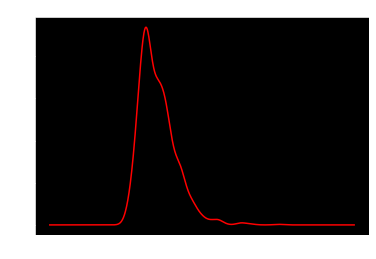

In [238]:
df['price'].plot.kde(color='red');

In [239]:
df['price'].kurtosis()

3.7043432796814706

In [240]:
df[df['price'] > 30000].shape

(268, 19)

In [241]:
bins = [0, 7000, 10000, 13000, 16000, 18000, 20000, 22000, 24000, 26000, 28000, 30000, 35000, 40000, 50000, 95000]
labels = np.arange(0, 15)
df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels)
df.head()

,price,owner,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,mpg_city,mpg_highway,combined_mpg,condition,year,brand,make_model,one_owner,price_bin
0,18488.0,One Owner,No Accident / Damage Reported,NaN,43008,0,4-Cylinder Turbo,6-Speed Automatic,0,Summit White,Jet Black W/Leather-Appointed,27,36,63,1,2018,0,Chevrolet Malibu LT w/ 1LT,1,5
1,73991.0,One Owner,No Accident / Damage Reported,GREAT,641,1,6-Cylinder Turbo,10-Speed Automatic,0,Liquid Platinum,Chateau,16,25,41,1,2020,1,Lexus LS 500 AWD,1,14
2,33936.0,One Owner,No Accident / Damage Reported,GREAT,26827,2,8-Cylinder,8-Speed Automatic,0,Sublime Pearl Coat,Black,15,25,40,1,2015,2,Dodge Challenger Scat Pack,1,11
3,18989.0,One Owner,No Accident / Damage Reported,GREAT,26562,0,6-Cylinder,6-Speed Automatic,1,Bruiser Gray Clearcoat,Black,17,25,42,1,2018,2,Dodge Journey FWD Crossroad,1,5
4,29858.0,Multiple Owners,No Accident / Damage Reported,GOOD,7559,1,4-Cylinder Turbo,8-Speed Automatic,0,Desert Gold Metallic,Ebony,23,31,54,1,2020,3,Ford Escape 4WD SEL,0,10


### ===== accident =====

In [242]:
df.loc[(df['accident'].isna()) & (df['mileage'] < 500), 'accident'] = 'No Accident / Damage Reported'
df.loc[(df['accident'].isna()) & (df['condition'] == 3), 'accident'] = 'No Accident / Damage Reported'
df.loc[(df['accident'].isna()) & (df['condition'] == 2), 'accident'] = 'No Accident / Damage Reported'
df.loc[(df['accident'].isna()) & (df['price'] > 10000), 'accident'] = 'No Accident / Damage Reported'
df.loc[(df['accident'].isna()) & (df['price'] < 10000), 'accident'] = 'Accident / Damage Reported'

df = df.drop('owner', axis=1)
df.head()

,price,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,mpg_city,mpg_highway,combined_mpg,condition,year,brand,make_model,one_owner,price_bin
0,18488.0,No Accident / Damage Reported,NaN,43008,0,4-Cylinder Turbo,6-Speed Automatic,0,Summit White,Jet Black W/Leather-Appointed,27,36,63,1,2018,0,Chevrolet Malibu LT w/ 1LT,1,5
1,73991.0,No Accident / Damage Reported,GREAT,641,1,6-Cylinder Turbo,10-Speed Automatic,0,Liquid Platinum,Chateau,16,25,41,1,2020,1,Lexus LS 500 AWD,1,14
2,33936.0,No Accident / Damage Reported,GREAT,26827,2,8-Cylinder,8-Speed Automatic,0,Sublime Pearl Coat,Black,15,25,40,1,2015,2,Dodge Challenger Scat Pack,1,11
3,18989.0,No Accident / Damage Reported,GREAT,26562,0,6-Cylinder,6-Speed Automatic,1,Bruiser Gray Clearcoat,Black,17,25,42,1,2018,2,Dodge Journey FWD Crossroad,1,5
4,29858.0,No Accident / Damage Reported,GOOD,7559,1,4-Cylinder Turbo,8-Speed Automatic,0,Desert Gold Metallic,Ebony,23,31,54,1,2020,3,Ford Escape 4WD SEL,0,10


In [243]:
df['accident'].value_counts()

No Accident / Damage Reported    954
Accident / Damage Reported       164
Name: accident, dtype: int64

In [244]:
accident_dict = {'No Accident / Damage Reported': 1, 'Accident / Damage Reported': 0}

df['accident'] = df['accident'].map(accident_dict)

### ===== price_rating =====

In [245]:
df[df['price_rating'].isna()][:5]

,price,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,mpg_city,mpg_highway,combined_mpg,condition,year,brand,make_model,one_owner,price_bin
0,18488.0,1,NaN,43008,0,4-Cylinder Turbo,6-Speed Automatic,0,Summit White,Jet Black W/Leather-Appointed,27,36,63,1,2018,0,Chevrolet Malibu LT w/ 1LT,1,5
28,12990.0,1,NaN,112873,0,6-Cylinder,6-Speed Automatic,1,Champagne Silver Metallic,Dark Titanium/Jet Black W/Sued,19,28,47,1,2014,0,Chevrolet Impala LT,0,2
35,12495.0,1,NaN,33220,0,4-Cylinder,Continuously Variable Automatic,0,Gray,Black,27,38,65,1,2018,12,Nissan Altima 2.5 SV Sedan,0,2
56,19700.0,0,NaN,24448,2,4-Cylinder,5-Speed Automatic,0,17 City / 22 Highway,Glacier White,60,60,120,1,2018,12,Nissan Frontier King Cab S,0,5
84,19000.0,1,NaN,0,0,4-Cylinder Turbo,6-Speed Automatic,0,Rapid Red Metallic Tinted Clearcoat - Red,Medium Light Stone Cloth,23,34,57,3,2020,3,Ford Fusion SE,1,5


In [246]:
df['price_rating'].fillna('N/A', inplace=True)

In [247]:
price_rating_dict = {'N/A': 0, 'GOOD': 1, 'GREAT': 2}
df['price_rating'] = df['price_rating'].map(price_rating_dict)
df.head()

,price,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,mpg_city,mpg_highway,combined_mpg,condition,year,brand,make_model,one_owner,price_bin
0,18488.0,1,0,43008,0,4-Cylinder Turbo,6-Speed Automatic,0,Summit White,Jet Black W/Leather-Appointed,27,36,63,1,2018,0,Chevrolet Malibu LT w/ 1LT,1,5
1,73991.0,1,2,641,1,6-Cylinder Turbo,10-Speed Automatic,0,Liquid Platinum,Chateau,16,25,41,1,2020,1,Lexus LS 500 AWD,1,14
2,33936.0,1,2,26827,2,8-Cylinder,8-Speed Automatic,0,Sublime Pearl Coat,Black,15,25,40,1,2015,2,Dodge Challenger Scat Pack,1,11
3,18989.0,1,2,26562,0,6-Cylinder,6-Speed Automatic,1,Bruiser Gray Clearcoat,Black,17,25,42,1,2018,2,Dodge Journey FWD Crossroad,1,5
4,29858.0,1,1,7559,1,4-Cylinder Turbo,8-Speed Automatic,0,Desert Gold Metallic,Ebony,23,31,54,1,2020,3,Ford Escape 4WD SEL,0,10


### ===== mileage ===== 

In [248]:
df['mileage'].describe()

count      1118.000000
mean      38396.494633
std       30459.308999
min           0.000000
25%       17765.000000
50%       32253.500000
75%       49618.250000
max      195634.000000
Name: mileage, dtype: float64

In [249]:
pd.qcut(df['mileage'], q=15).value_counts()

(90409.867, 195634.0]     75
(58039.8, 70688.267]      75
(41735.0, 47395.467]      75
(34042.733, 37296.2]      75
(27943.0, 30712.667]      75
(19259.4, 24505.0]        75
(7223.2, 14033.4]         75
(-0.001, 2398.667]        75
(70688.267, 90409.867]    74
(47395.467, 58039.8]      74
(37296.2, 41735.0]        74
(30712.667, 34042.733]    74
(24505.0, 27943.0]        74
(14033.4, 19259.4]        74
(2398.667, 7223.2]        74
Name: mileage, dtype: int64

In [250]:
df['mileage_15'] = pd.qcut(df['mileage'], q=15, labels=np.arange(0, 15))

### ===== engine =====

In [251]:
df['engine'].value_counts()

4-Cylinder                 318
6-Cylinder                 302
4-Cylinder Turbo           241
8-Cylinder                 150
6-Cylinder Turbo            73
8-Cylinder Turbo            14
3-Cylinder Turbo             7
Electric                     6
8-Cylinder Supercharged      6
3-Cylinder                   1
Name: engine, dtype: int64

In [252]:
df['engine_#'] = [item.split('-')[0] for item in df['engine']]
df.head()

,price,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,...,mpg_highway,combined_mpg,condition,year,brand,make_model,one_owner,price_bin,mileage_15,engine_#
0,18488.0,1,0,43008,0,4-Cylinder Turbo,6-Speed Automatic,0,Summit White,Jet Black W/Leather-Appointed,...,36,63,1,2018,0,Chevrolet Malibu LT w/ 1LT,1,5,10,4
1,73991.0,1,2,641,1,6-Cylinder Turbo,10-Speed Automatic,0,Liquid Platinum,Chateau,...,25,41,1,2020,1,Lexus LS 500 AWD,1,14,0,6
2,33936.0,1,2,26827,2,8-Cylinder,8-Speed Automatic,0,Sublime Pearl Coat,Black,...,25,40,1,2015,2,Dodge Challenger Scat Pack,1,11,5,8
3,18989.0,1,2,26562,0,6-Cylinder,6-Speed Automatic,1,Bruiser Gray Clearcoat,Black,...,25,42,1,2018,2,Dodge Journey FWD Crossroad,1,5,5,6
4,29858.0,1,1,7559,1,4-Cylinder Turbo,8-Speed Automatic,0,Desert Gold Metallic,Ebony,...,31,54,1,2020,3,Ford Escape 4WD SEL,0,10,2,4


In [253]:
df['engine_#'].value_counts()

4           559
6           375
8           170
3             8
Electric      6
Name: engine_#, dtype: int64

In [254]:
df['electric'] = [1 if item == 'Electric' else 0 for item in df['engine_#']]

In [255]:
df['turbo'] = [item.split()[-1] for item in df['engine']]

In [256]:
df.loc[(df['turbo'] == 'Turbo') | (df['turbo'] == 'Supercharged'), 'turbo'] 

0       Turbo
1       Turbo
4       Turbo
10      Turbo
11      Turbo
        ...  
1135    Turbo
1138    Turbo
1144    Turbo
1147    Turbo
1148    Turbo
Name: turbo, Length: 341, dtype: object

In [257]:
df['turbo'] = [1 if item == 'Turbo' or item == 'Supercharged' else 0 for item in df['turbo']]

### ===== transmission =====

In [258]:
df['transmission'].value_counts()

6-Speed Automatic                   486
8-Speed Automatic                   187
Continuously Variable Automatic     172
9-Speed Automatic                    73
10-Speed Automatic                   69
6-Speed Manual                       31
5-Speed Automatic                    31
7-Speed Automatic                    24
6-Speed Shiftable Automatic          11
4-Speed Automatic                    11
Information Unavailable               7
Single-Speed                          6
5-Speed Manual                        4
Automatic                             2
5-Speed Automatic with Overdrive      2
8-Speed Shiftable Automatic           1
5-Speed Manual with Overdrive         1
Name: transmission, dtype: int64

In [259]:
df['trans_#'] = df['transmission'].str.extract('(\d+)')
df.loc[df['transmission'] == 'Single-Speed', 'trans_#'] = 1

# NOT SURE ON THIS
df.loc[df['trans_#'].isna(), 'trans_#'] = 0

In [260]:
df['automatic'] = df['transmission'].str.contains('Automatic').astype(int)
df.head()

,price,accident,price_rating,mileage,drive_type,engine,transmission,fuel_type,exterior,interior,...,brand,make_model,one_owner,price_bin,mileage_15,engine_#,electric,turbo,trans_#,automatic
0,18488.0,1,0,43008,0,4-Cylinder Turbo,6-Speed Automatic,0,Summit White,Jet Black W/Leather-Appointed,...,0,Chevrolet Malibu LT w/ 1LT,1,5,10,4,0,1,6,1
1,73991.0,1,2,641,1,6-Cylinder Turbo,10-Speed Automatic,0,Liquid Platinum,Chateau,...,1,Lexus LS 500 AWD,1,14,0,6,0,1,10,1
2,33936.0,1,2,26827,2,8-Cylinder,8-Speed Automatic,0,Sublime Pearl Coat,Black,...,2,Dodge Challenger Scat Pack,1,11,5,8,0,0,8,1
3,18989.0,1,2,26562,0,6-Cylinder,6-Speed Automatic,1,Bruiser Gray Clearcoat,Black,...,2,Dodge Journey FWD Crossroad,1,5,5,6,0,0,6,1
4,29858.0,1,1,7559,1,4-Cylinder Turbo,8-Speed Automatic,0,Desert Gold Metallic,Ebony,...,3,Ford Escape 4WD SEL,0,10,2,4,0,1,8,1


### ===== exterior =====

In [261]:
df['exterior'].value_counts()

Black                           51
White                           34
Silver                          30
Shadow Black                    29
Ingot Silver Metallic           26
                                ..
Barcelona Red Metallic - Red     1
Milano Red                       1
42 City / 37 Highway             1
Octane Red Pearlcoat             1
Cosmic Gray Mica                 1
Name: exterior, Length: 376, dtype: int64

In [262]:
df.loc[df['exterior'].str.contains('(\d+)'), 'exterior'] = 'N/A'

In [263]:
df['color'] = df['exterior'].str.extract('(White|Black|Red|Orange|Yellow|Blue|Purple|Green|Silver|Burgundy|Gray|Grey|Brown|Pearl|Gold|Mocha|Nickel|Beige|Ingot|Tan|Tungsten|Granite|Metallic|Ebony)')
df['color'].value_counts()

White       175
Black       172
Silver      109
Red          86
Blue         85
Metallic     69
Gray         65
Ingot        31
Pearl        16
Granite      16
Ebony        15
Orange        7
Brown         6
Burgundy      4
Green         4
Tan           4
Gold          3
Yellow        3
Beige         2
Nickel        2
Tungsten      1
Mocha         1
Name: color, dtype: int64

In [264]:
df['color'].fillna('N/A', inplace=True)

### ===== interior =====

In [265]:
df['interior'].fillna('N/A', inplace=True)
df.loc[df['interior'].str.contains('(\d+)', regex=True), 'interior'] = 'N/A'

In [266]:
# [item.split() for item in df['interior']]

In [267]:
df['interior'] = df['interior'].str.extract('(White|Black|Red|Orange|Yellow|Blue|Purple|Green|Silver|Burgundy|Gray|Grey|Brown|Pearl|Gold|Mocha|Nickel|Beige|Ingot|Tan|Tungsten|Granite|Metallic|Sandstone|Ebony|Adobe)')
df['interior'].value_counts()

Black        507
Gray         105
Ebony         95
White         54
Red           36
Silver        29
Beige         27
Blue          12
Metallic      12
Pearl          7
Brown          6
Sandstone      6
Granite        3
Ingot          2
Mocha          2
Tan            2
Orange         1
Burgundy       1
Adobe          1
Name: interior, dtype: int64

In [268]:
df['interior'].fillna('N/A', inplace=True)

## ===== Exploratory Data Analysis =====

In [269]:
df.columns.values

array(['price', 'accident', 'price_rating', 'mileage', 'drive_type',
       'engine', 'transmission', 'fuel_type', 'exterior', 'interior',
       'mpg_city', 'mpg_highway', 'combined_mpg', 'condition', 'year',
       'brand', 'make_model', 'one_owner', 'price_bin', 'mileage_15',
       'engine_#', 'electric', 'turbo', 'trans_#', 'automatic', 'color'],
      dtype=object)

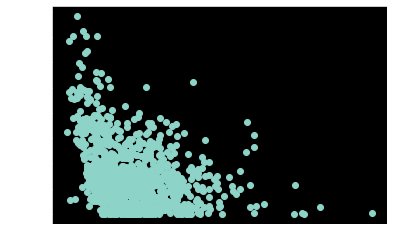

In [270]:
plt.scatter(df['price'], df['mileage'])

In [271]:
cols = ['year', 'brand', 'make_model', 'price', 'price_bin', 'price_rating', 'mileage', 'mileage_15', 'mpg_city', 'mpg_highway', 'combined_mpg', 'condition', 'accident', 'one_owner', 'drive_type', 'fuel_type', 'engine', 'engine_#', 'automatic', 'turbo', 'electric', 'transmission', 'trans_#', 'interior', 'exterior', 'color']
len(col1)

26

In [272]:
df = df[cols]
df.head()

,year,brand,make_model,price,price_bin,price_rating,mileage,mileage_15,mpg_city,mpg_highway,...,engine,engine_#,automatic,turbo,electric,transmission,trans_#,interior,exterior,color
0,2018,0,Chevrolet Malibu LT w/ 1LT,18488.0,5,0,43008,10,27,36,...,4-Cylinder Turbo,4,1,1,0,6-Speed Automatic,6,Black,Summit White,White
1,2020,1,Lexus LS 500 AWD,73991.0,14,2,641,0,16,25,...,6-Cylinder Turbo,6,1,1,0,10-Speed Automatic,10,N/A,Liquid Platinum,N/A
2,2015,2,Dodge Challenger Scat Pack,33936.0,11,2,26827,5,15,25,...,8-Cylinder,8,1,0,0,8-Speed Automatic,8,Black,Sublime Pearl Coat,Pearl
3,2018,2,Dodge Journey FWD Crossroad,18989.0,5,2,26562,5,17,25,...,6-Cylinder,6,1,0,0,6-Speed Automatic,6,Black,Bruiser Gray Clearcoat,Gray
4,2020,3,Ford Escape 4WD SEL,29858.0,10,1,7559,2,23,31,...,4-Cylinder Turbo,4,1,1,0,8-Speed Automatic,8,Ebony,Desert Gold Metallic,Gold
